
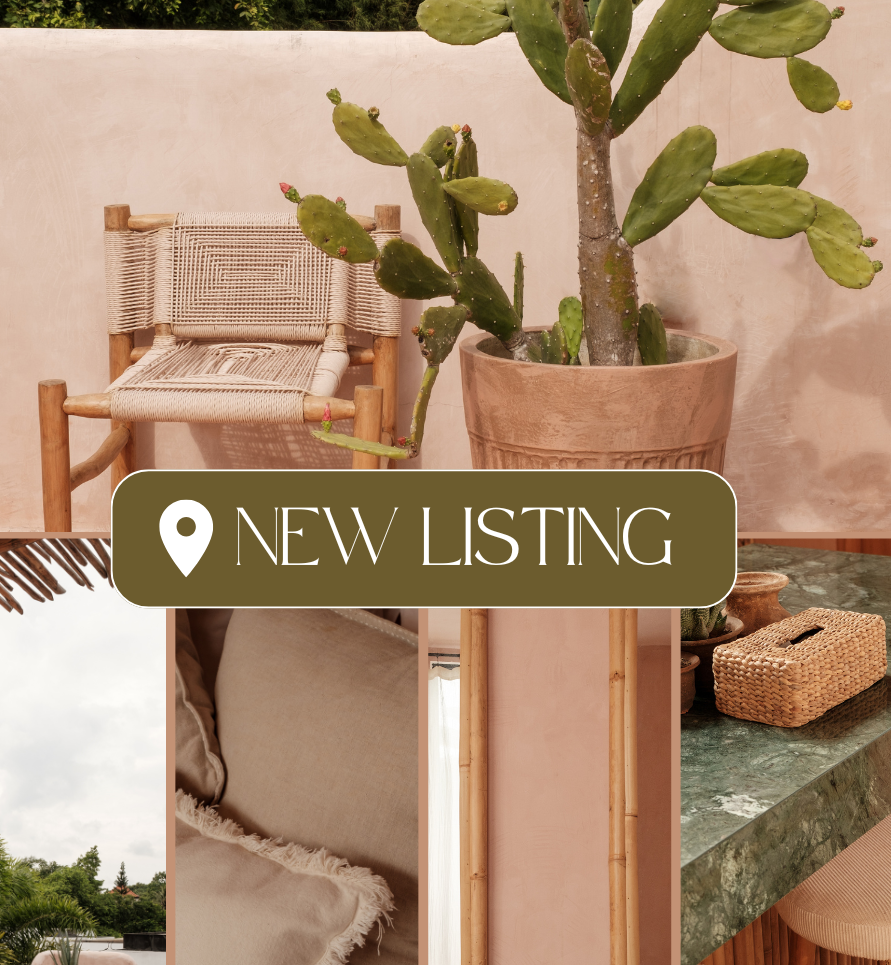

## PROJECT OVERVIEW

Paris is the capital and most populous city of France. According to recent statistics, it's one of the world's leading centers for business, culture, and tourism, attracting millions of visitors annually. 
Given the Paris Airbnb dataset, we undertook research on behalf of InvestInParis Real Estate Investors to find out the best performing metrics affecting short-term rental prices and occupancy rates. 

## BUSINNES PROBLEM

InvestInParis, a leading real estate investment firm, is poised for expansion and aspires to solidify its position as the premier short-term rental property investor in Paris. To achieve this goal, InvestInParis recognizes the critical need to optimize its Return on Investment (ROI). 
The company aims to leverage the vast potential within the Paris Airbnb dataset to seek strategic insights and data-driven solutions to enhance decision-making, identify lucrative investment opportunities, and ultimately maximize ROI. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
#load the csv file into a pandas dataframe
df= pd.read_csv('Listings.csv',encoding='ISO-8859-1',parse_dates=['host_since'], low_memory = False,index_col=0)
df

,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
listing_id,,,,,,,,,,,,,,,,,,,,,
281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
# displays the columns and values
# shows null values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279712 entries, 281420 to 40219504
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   name                         279539 non-null  object        
 1   host_id                      279712 non-null  int64         
 2   host_since                   279547 non-null  datetime64[ns]
 3   host_location                278872 non-null  object        
 4   host_response_time           150930 non-null  object        
 5   host_response_rate           150930 non-null  float64       
 6   host_acceptance_rate         166625 non-null  float64       
 7   host_is_superhost            279547 non-null  object        
 8   host_total_listings_count    279547 non-null  float64       
 9   host_has_profile_pic         279547 non-null  object        
 10  host_identity_verified       279547 non-null  object        
 11  neighbourhood      

In [5]:
# check for columns
df.columns

Index(['name', 'host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'district', 'city',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [6]:
# Filter the data down to rows where the city is Paris, and 
# keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
DF = df.query("city == 'Paris'").loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
DF

,host_since,neighbourhood,city,accommodates,price
listing_id,,,,,
281420,2011-12-03,Buttes-Montmartre,Paris,2,53
3705183,2013-11-29,Buttes-Montmartre,Paris,2,120
4082273,2014-07-31,Elysee,Paris,2,89
4797344,2013-12-17,Vaugirard,Paris,2,58
4823489,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
38338635,2015-04-13,Observatoire,Paris,2,120
38538692,2013-11-27,Buttes-Montmartre,Paris,2,60
38683356,2012-04-27,Buttes-Montmartre,Paris,2,50


In [7]:
# check for missing values
DF.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [8]:
# calculating the minimum, maximum, and average for each numeric field

DF.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [9]:
# Group by 'neighbourhood' and calculate the mean price
paris_listings_neighbourhood = DF.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by mean price in ascending order
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values(by='price')

In [10]:
 #Display the resulting DataFrame
paris_listings_neighbourhood

,neighbourhood,price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459
6,Gobelins,98.110184
11,Observatoire,101.866801
0,Batignolles-Monceau,102.612702
5,Enclos-St-Laurent,102.967156
19,Vaugirard,106.831330


In [11]:
# Identify the most expensive neighborhood
most_expensive_neighborhood = DF.groupby('neighbourhood')['price'].mean().idxmax()

# Filter down to the most expensive neighborhood
expensive_neighborhood_df = DF[DF['neighbourhood'] == most_expensive_neighborhood]

# Group by 'accommodates' and calculate the mean price
paris_listings_accommodations = expensive_neighborhood_df.groupby('accommodates')['price'].mean().reset_index()

# Sort by mean price in ascending order
paris_listings_accommodations = paris_listings_accommodations.sort_values(by='price')

In [12]:
#Display the resulting DataFrame
paris_listings_accommodations 

,accommodates,price
0,0,0.000000
1,1,79.522222
3,3,152.828767
2,2,155.103352
4,4,212.096070
5,5,328.817073
6,6,355.508571
8,8,405.518519
7,7,411.538462
9,9,440.272727


In [13]:
# Extract the year from the 'host_since' column
DF['host_since_year'] = DF['host_since'].dt.year

# Group by 'host_since_year' and calculate the average price and count of new hosts
paris_listings_over_time = DF.groupby('host_since_year').agg(
    average_price=('price', 'mean'),
    new_hosts=('host_since', 'count')
).reset_index()

# Sort by 'host_since_year' in ascending order
paris_listings_over_time = paris_listings_over_time.sort_values(by='host_since_year')

In [14]:
## Display the resulting DataFrame
paris_listings_over_time

,host_since_year,average_price,new_hosts
0,2008.0,77.750000,4
1,2009.0,159.641509,106
2,2010.0,125.031250,416
3,2011.0,124.828230,1339
4,2012.0,111.578615,4592
5,2013.0,107.096414,8142
6,2014.0,100.253800,10922
7,2015.0,103.646250,12147
8,2016.0,114.159847,8871
9,2017.0,108.658888,4585


## DATA ANALYSIS AND PREPARATION

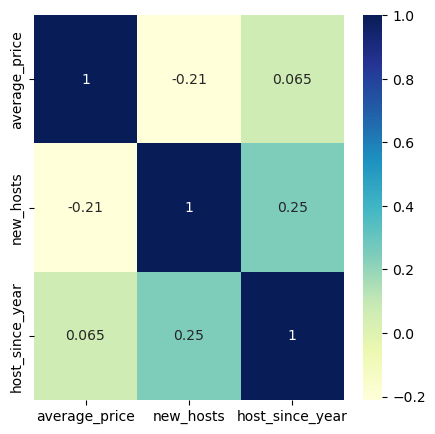

In [17]:
paris_listings_over_time=paris_listings_over_time[['average_price','new_hosts',
    'host_since_year']]
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(paris_listings_over_time.corr(),cmap = 'YlGnBu',annot=True,ax=ax)
plt.savefig('correlation_heatmap')

Key Points:

The numbers represent correlation coefficients, indicating the strength and relationships between variables. These range from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no correlation. Positive coefficients suggest variables tend to increase or decrease together, while negative coefficients suggest opposite trends.

Average_price and new_hosts: -0.21
    
This indicates a weak negative correlation. 
As the number of new hosts increases, there's a slight tendency for the average price to decrease, or vice versa. 
However, the relationship is not very strong.

Average_price and host_since_year: 0.065
    
This shows a very weak positive correlation, almost negligible. 
There's barely any relationship between how long a host has been on the platform and the average price of listings.

New_hosts and host_since_year: 0.25
    
This indicates a weak to moderate positive correlation. 
As the year progresses (host_since_year increases), there's a slight tendency for the number of new hosts to increase as well.

In [18]:
most_expensive_neighborhood = DF.groupby('neighbourhood')['price'].mean().idxmax()
print(most_expensive_neighborhood)


Elysee


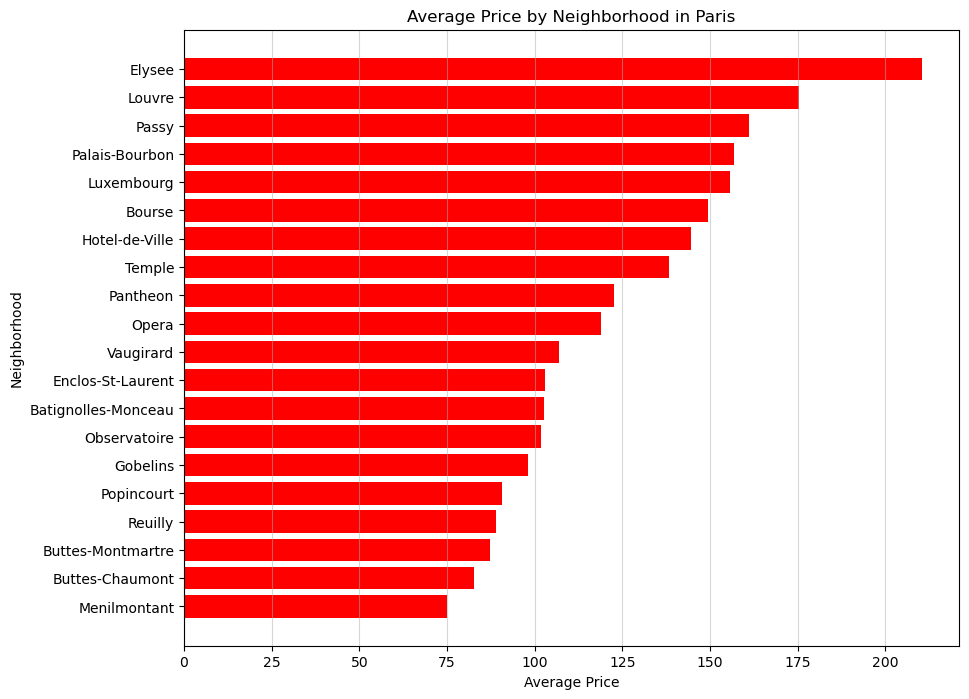

In [19]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Average Price by Neighborhood in Paris')
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.show()

As one can observe from the above visualization,the neighborhood Elysee has the highest average price while Menilmontant has the lowest average price among the listed neighborhoods.

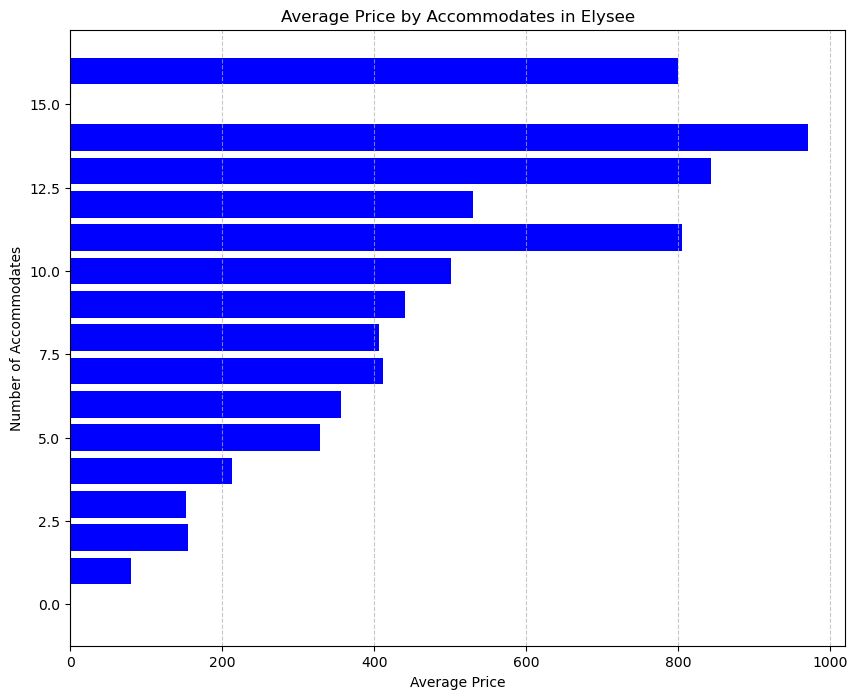

In [20]:
# Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood.
plt.figure(figsize=(10, 8))
plt.barh(paris_listings_accommodations['accommodates'], paris_listings_accommodations['price'], color='blue')
plt.xlabel('Average Price')
plt.ylabel('Number of Accommodates')
plt.title(f'Average Price by Accommodates in {most_expensive_neighborhood}')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

From the visualization above, the cost of accommodations tends to increase with the number of people they can accommodate, reflecting the higher demand for larger spaces

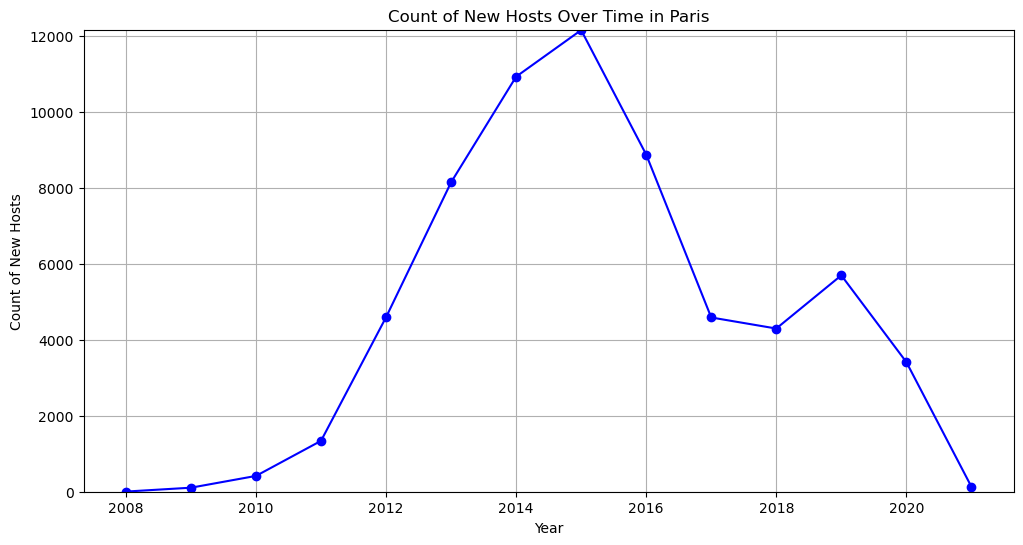

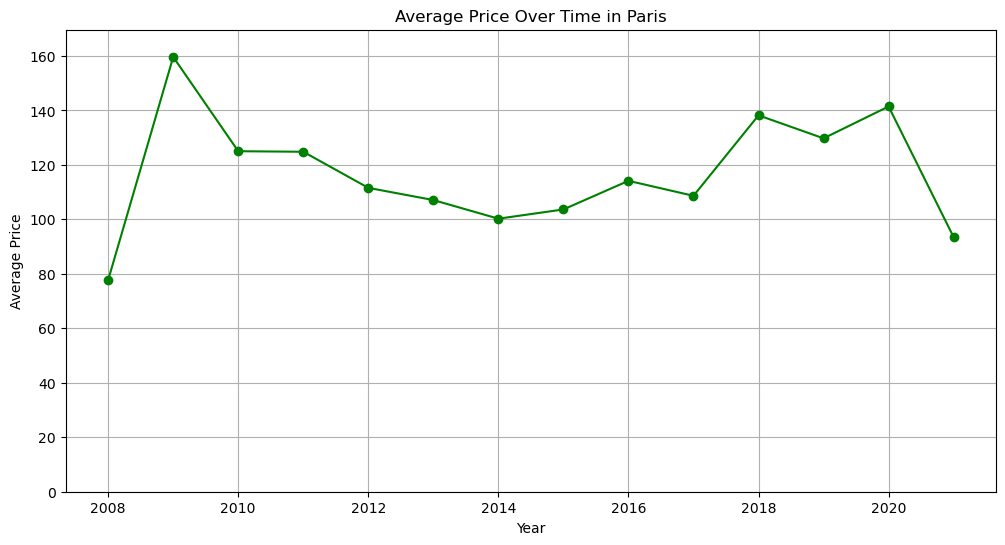

In [28]:
# Create the first line chart for the count of new hosts over time
plt.figure(figsize=(12, 6))
plt.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts'], marker='o', linestyle='-', color='b')
plt.ylim(0, paris_listings_over_time['new_hosts'].max() + 10)
plt.xlabel('Year')
plt.ylabel('Count of New Hosts')
plt.title('Count of New Hosts Over Time in Paris')
plt.grid(True)
plt.show()



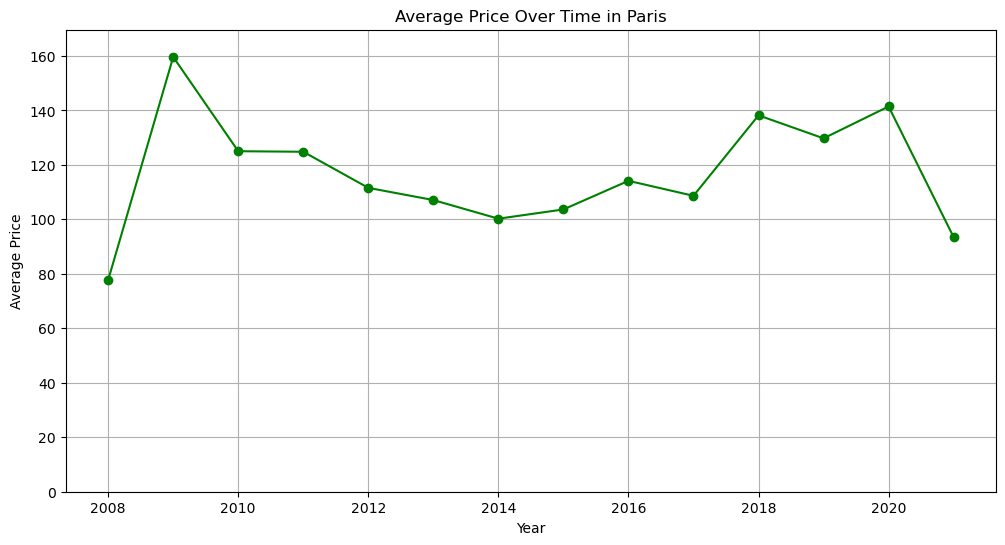

In [29]:
# Create the second line chart for the average price over time
plt.figure(figsize=(12, 6))
plt.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], marker='o', linestyle='-', color='g')
plt.ylim(0, paris_listings_over_time['average_price'].max() + 10)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Over Time in Paris')
plt.grid(True)
plt.show()

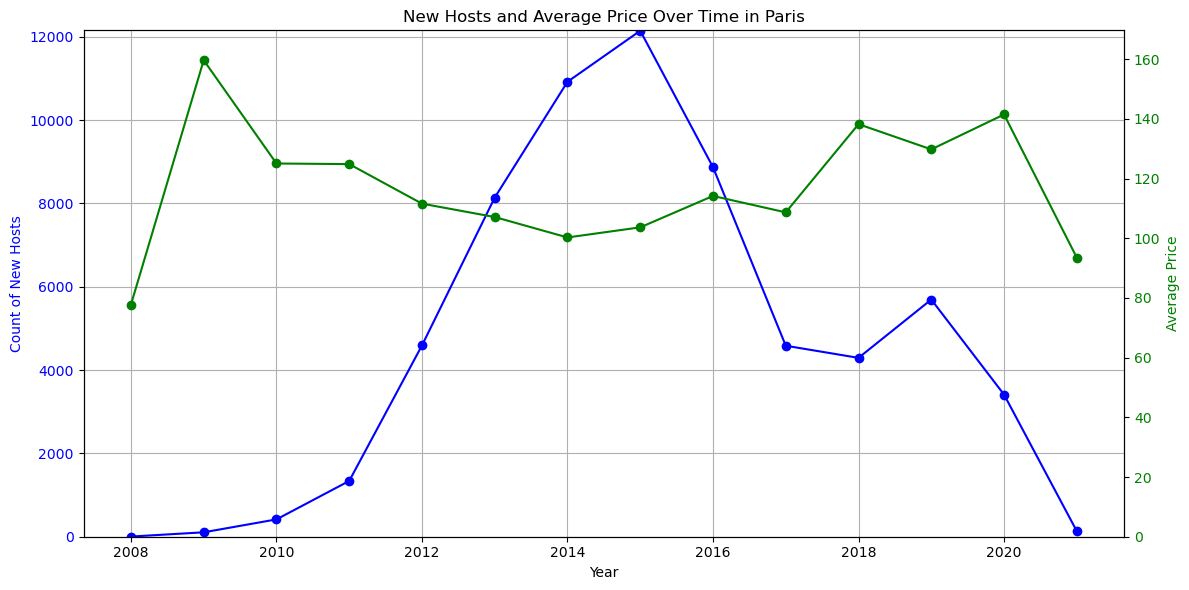

In [22]:
# Create a dual axis line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of new hosts
ax1.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['new_hosts'], color='b', marker='o', linestyle='-', label='New Hosts')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of New Hosts', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0, paris_listings_over_time['new_hosts'].max() + 10)

# Create a second y-axis for the average price
ax2 = ax1.twinx()
ax2.plot(paris_listings_over_time['host_since_year'], paris_listings_over_time['average_price'], color='g', marker='o', linestyle='-', label='Average Price')
ax2.set_ylabel('Average Price', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, paris_listings_over_time['average_price'].max() + 10)

# Add a title and grid
plt.title('New Hosts and Average Price Over Time in Paris')
ax1.grid(True)

# Show the plot
fig.tight_layout()
plt.show()

The line graph titled “New Hosts and Average Price Over Time in Paris” shows the trends in the number of new hosts and the average price of accommodations in Paris from 2008 to 2020. 
The green line with circular markers represents the count of new hosts, which increased until around 2014, then declined and stabilized. The blue line with diamond markers shows the average price, peaking around 2012 and 2016 before slightly decreasing towards 2020. 
This graph highlights the relationship between the influx of new hosts and the fluctuations in average accommodation prices over time.


### OBSERVATIONS
A decrease in new hosts combined with an increase in prices suggests that the regulations reduced the supply of listings, leading to higher prices.
The market shows signs of adaptation, such as a gradual increase in new hosts and stabilization of prices after an initial impact, which indicates that hosts and guests adjusted to the new regulatory environment.

### RECOMMENDATIONS

Adapt to Market Changes:Stay informed about market trends and be ready to adapt your strategies to changing conditions.
    
Focus on Quality: Prioritize the quality of your listings and guest experiences to build a strong reputation and attract repeat customers.
Utilize Technology: Leverage technology and data analytics to make informed decisions and optimize your hosting business.